In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

# Visualización básica

In [2]:
sp500 = pd.read_excel('S&P500.xlsx')

In [3]:
sp500.head()

,FECHA,S&P 500
0,2019-01-02,2510.03
1,2019-01-03,2447.89
2,2019-01-04,2531.94
3,2019-01-07,2549.69
4,2019-01-08,2574.41


In [4]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   FECHA    506 non-null    datetime64[ns]
 1   S&P 500  506 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB


In [5]:
sp500.set_index('FECHA', inplace=True)

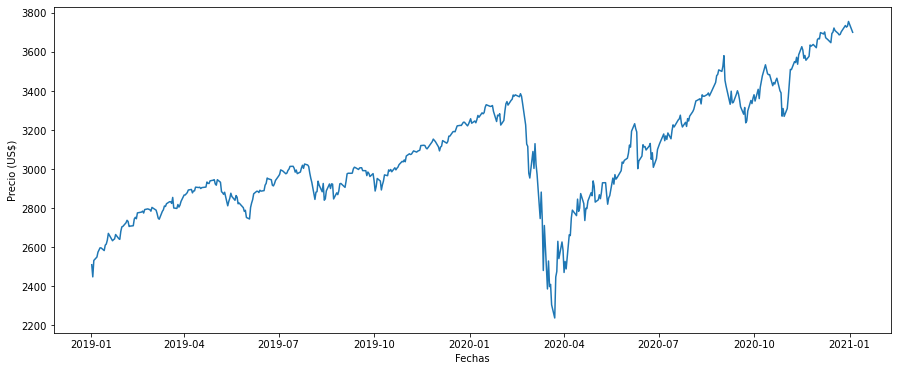

In [6]:
plt.figure(figsize=(15,6))
plt.plot(sp500)
plt.ylabel('Precio (US$)')
plt.xlabel('Fechas')
plt.show()

# Visualización detallada

In [7]:
#Funcion para automatizar la evaluacion de promedio moviles y valores atipicos
def GraficarPromedioMovil(df,ventana,intervalos=False,escala=2,anomalias=False):
    
    promedio_movil = df.rolling(window=ventana).mean()
    
    plt.figure(figsize=(15,5))
    plt.title("Promedio movil\n ventana = {}".format(ventana))
    plt.plot(promedio_movil,"g",label="Tendencia de Promedio Movil")
    
    if intervalos:
        error_absoluto_medio = mean_absolute_error(df[ventana:],df.rolling(window=ventana).mean()[ventana:])
        desviacion_error = np.std(df[ventana:] - df.rolling(window=ventana).mean()[ventana:])
        banda_inferior = df.rolling(window=ventana).mean()[ventana:] - (error_absoluto_medio + escala*desviacion_error)
        banda_superior = df.rolling(window=ventana).mean()[ventana:] + (error_absoluto_medio + escala*desviacion_error)
        plt.plot(banda_superior,"r--", label="Banda Superior /Banda Inferior")
        plt.plot(banda_inferior,"r--")
        
    if anomalias:
        anomalias = pd.DataFrame(index=df.index, columns=df.columns)
        anomalias[df[ventana:]<banda_inferior] = df[ventana:][df[ventana:]<banda_inferior]
        anomalias[df[ventana:]>banda_superior] = df[ventana:][df[ventana:]>banda_superior]
        plt.plot(anomalias,"ro",markersize=10)
        
    plt.plot(df[ventana:], label="Valores reales")
    plt.legend(loc="upper left")
    plt.grid(True)

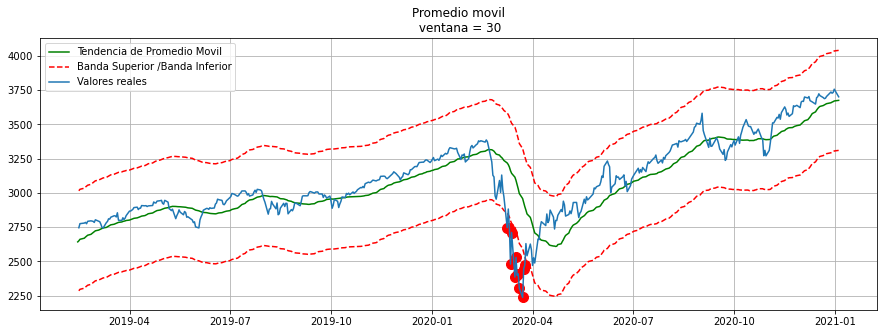

In [8]:
GraficarPromedioMovil(sp500, 30, intervalos=True, escala=2,anomalias=True)

# Descomposición de una Serie de Tiempo

**- Tendencia:** calcula usando un promedio móvil centrado de la serie de tiempo. La media móvil se calcula utilizando una longitud de ventana correspondiente a la frecuencia de la serie temporal. Por ejemplo, usaríamos una ventana de longitud 12 para datos mensuales, en el caso de nosotros los datos son diarios y utilizaremos una ventana de 1 año por lo cual, sería 365.

**- Estacionalidad:** Para calcular el componente estacional, primero debemos eliminar la tendencia de la serie temporal. Lo hacemos restando el componente de tendencia de la serie de tiempo original.

Una vez hecho esto, calculamos los valores promedio de la serie sin tendencia para cada período estacional. En el caso de los meses, calcularíamos el valor sin tendencia promedio para cada mes.

El componente estacional simplemente se construye a partir de los promedios estacionales repetidos a lo largo de toda la serie Nuevamente, este es uno de los argumentos en contra del uso de la descomposición estacional simple: no se permite que el componente estacional cambie con el tiempo, lo que puede ser una medida muy estricta, ademas de una suposición poco realista para series de tiempo largas.

**- Residuos:** El último componente es simplemente lo que queda después de eliminar (restando o dividiendo) los componentes de tendencia y estacionales de la serie de tiempo original.


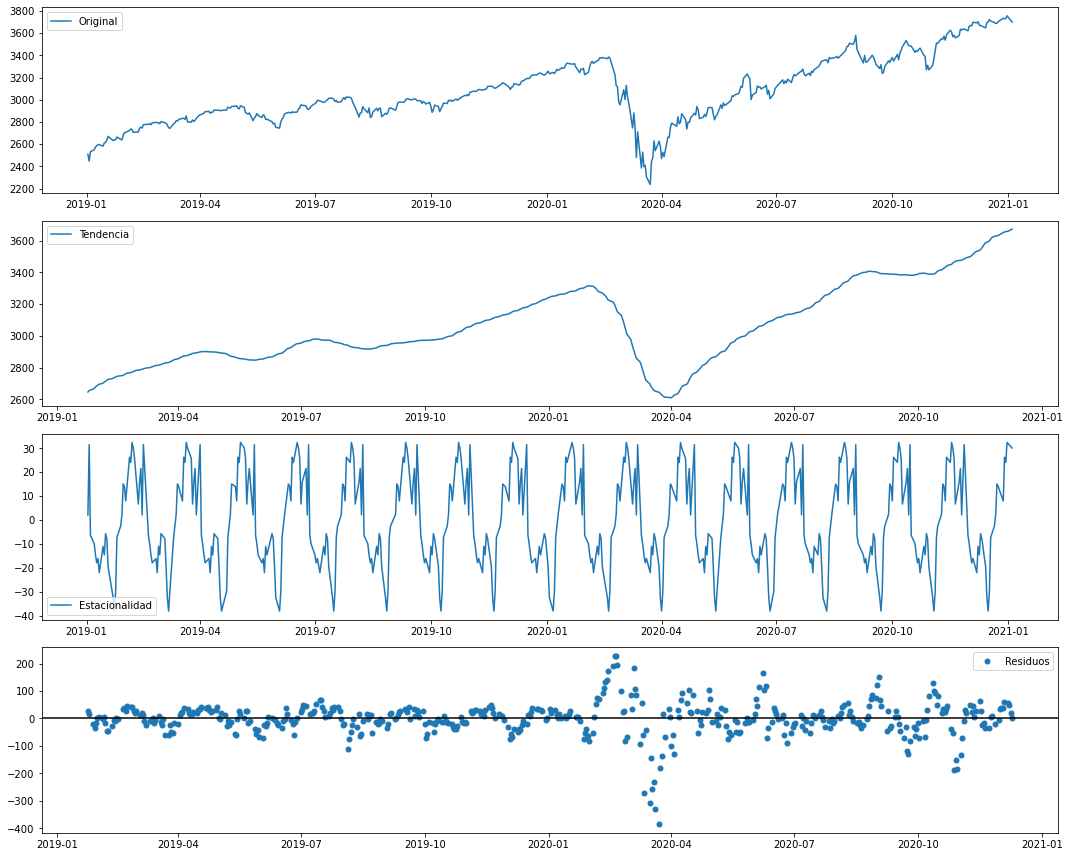

In [9]:
descomposicion = seasonal_decompose(sp500,period = 30)

tendencia = descomposicion.trend
estacionalidad = descomposicion.seasonal
residuos = descomposicion.resid
plt.figure(figsize=(15,12))
plt.subplot(411)
plt.plot(sp500, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(estacionalidad,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residuos, label='Residuos',marker='o', linestyle = 'None', markersize = 5)
plt.axhline(color='black')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# Fin